In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score

In [14]:
df=pd.read_csv('Walmart_Sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [15]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Define features(X) and Target(y)

In [16]:
X=df.drop(columns=['Weekly_Sales','Date'],axis=1)
y=df['Weekly_Sales']

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

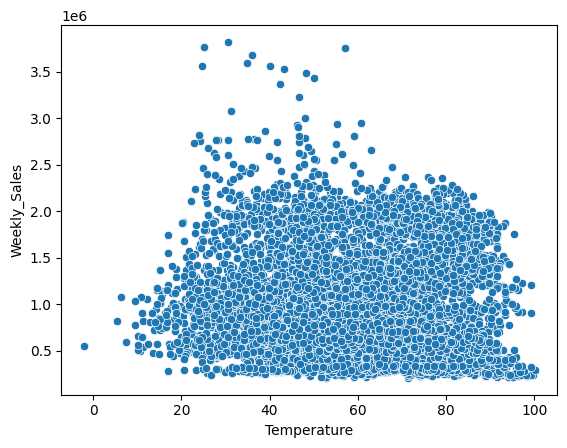

In [19]:
sns.scatterplot(data=df,x='Temperature',y='Weekly_Sales')

Split data into train and test set

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,train_size=0.8,random_state=42)

Standardize the features

In [ ]:
scaler = StandardScaler()
xtrain_stdscaler =scaler.fit_transform(Xtrain)
xtest_stdscaler =scaler.transform(Xtest)


Generate polynomial features w.r.t to standardize freatures

In [23]:
poly = PolynomialFeatures(degree=5)
xtrain_poly = poly.fit_transform(xtrain_stdscaler)
xtest_poly = poly.transform(xtest_stdscaler)

Create model

In [ ]:
model = LinearRegression()
model.fit(xtrain_poly, ytrain)

In [24]:
ypred = model.predict(xtest_poly)

In [25]:
r2_score(ytest, ypred)

0.6000687965887559